In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Grundfos/ALPHS_FC_Prepared_15_mth.csv')

In [3]:
MG = np.array(df.values)[2:, 1:].astype(np.float32)
PG = np.sum(MG, axis=0)

In [4]:
X_train, y_train = MG[:, :11], PG[11]
scale  = PG.max()

X_train = X_train / scale
y_train = y_train / scale

X_train = [ x[None,...,None] for x in X_train]
y_train = np.array(y_train).reshape((1,1))

In [21]:
y_train

array([[0.85273093]], dtype=float32)

In [20]:
# MODEL

In [6]:
import tensorflow as tf

In [22]:
inputs = []
for i in range(len(X_train)):
    in_ = tf.keras.layers.Input(shape=(X_train[0].shape[1], 1))
    inputs.append(in_)

lstms = []
for in_ in inputs:
    x = tf.keras.layers.LSTM(8)(in_)
    x = tf.keras.layers.Dense(1)(x)
    lstms.append(x)

x = tf.keras.layers.Add()(lstms)
model_all_outputs = tf.keras.models.Model(inputs,lstms)
model = tf.keras.models.Model(inputs, x)



In [43]:
model.compile(loss='mse', optimizer='adam')

In [35]:
# model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 0.4743
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.4368
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3989
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3606
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 0.3220
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2830
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2436
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2037
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.1633
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1223
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0807
Epoch 12/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0385
Epoch 13/50
1/1 [==============================] - 0s 10ms/step - los

In [26]:
X_pred = MG[:, 1:12] / scale
forecast = []
for i in range(3):
    try:
        XP = np.hstack((XP[:, 1:], forecast[-1][:,None]))
        print(XP.shape)
    except:
        XP = X_pred.copy()
    X_pred_lst = [ x[None,...,None] for x in XP]
    y_pred = model_all_outputs.predict(X_pred_lst)
    y_pred = np.array(y_pred).ravel()
    forecast.append(y_pred)
forecast = np.array(forecast).T

(7, 11)
(7, 11)


In [36]:
np.array(forecast)[0]*scale

array([8045.5044, 7439.7124, 7002.365 ], dtype=float32)

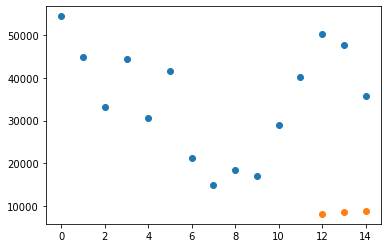

In [37]:
plt.plot(MG[5], 'o')
plt.plot(np.arange(12,15),np.array(forecast)[5]*scale, 'o')

In [42]:
np.array(forecast).sum(axis=0)

array([0.37632287, 0.38339883, 0.38722032], dtype=float32)

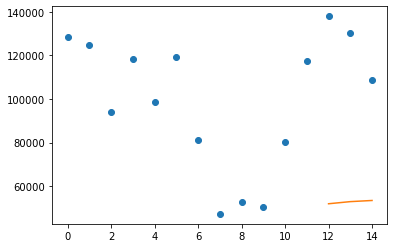

In [41]:
plt.plot(PG, 'o')
plt.plot(np.arange(12,15),np.array(forecast).sum(axis=0)*scale)

array([51909.223, 52885.27 , 53412.4  ], dtype=float32)

In [ ]:


# for i in range(3):
#     forecast[-1]

In [ ]:
i = 1

In [ ]:
forecast[-1].shape

In [ ]:
model.predict(X_train).shape

In [ ]:
(11,1) -> LSTM -> (8) -> 1

In [ ]:
scale

In [ ]:
y_train

In [ ]:
x